
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E01_gradient_descent.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Gradient descent exercises

---
These are introductory exercises in Machine learning with focus in **gradient descent** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Simulate dataset (*)

Simulate datasets according to these rules:

- set random seed to 42
- (1000,2) samples from $X \sim \mathcal{U}(0,1)$ , i.e. 1000 rows, 2 columns. 
- 1000 samples from $\epsilon \sim \mathcal{N}(0,1)$
- $y = 3x_1 + 5x_2 + 3 + \epsilon$ , where $x_i$ is column $i$ of $X$

Finally add a column of ones for the intercept to $X$.

<details>

<summary>Hint</summary>

Use for simulating X

´´´
np.random.rand(samples, 2)
´´´

to concatenate with ones, use ```np.c_[..., ...]```

</details>

<details>

<summary>Answer</summary>

```
array([[1.        , 0.37454012, 0.95071431],
       [1.        , 0.73199394, 0.59865848],
       [1.        , 0.15601864, 0.15599452],
       [1.        , 0.05808361, 0.86617615],
       [1.        , 0.60111501, 0.70807258]])

```

</details>

---

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

samples = 1000

X = np.random.rand(samples,2)
# epsilon = np.random.randn(samples, 1)
epsilon = np.random.normal(0,1,samples)
# y = 3*X + 5*X + 3 + epsilon
y = 3*X[:,0] + 5*X[:,1] + 3 + epsilon
X = np.c_[np.ones((samples,1)), X] # Lägger till en kolumn med 1:or för intercept på X

print(X[:5])

[[1.         0.37454012 0.95071431]
 [1.         0.73199394 0.59865848]
 [1.         0.15601864 0.15599452]
 [1.         0.05808361 0.86617615]
 [1.         0.60111501 0.70807258]]


In [ ]:
# print(X.shape, y.shape)
# X[:, 0].reshape((-1,1)) , X[:, 1].reshape((-1,1)) gör så att det går att plotta.
# plt.plot(X,y, ".")

[[1.         1.         0.37454012 0.95071431]
 [1.         1.         0.73199394 0.59865848]
 [1.         1.         0.15601864 0.15599452]
 [1.         1.         0.05808361 0.86617615]
 [1.         1.         0.60111501 0.70807258]]


## 1. Gradient descent - learning rate (*)

Use gradient descent to calculate $\vec{\theta} = (\theta_0, \theta_1, \theta_2)^T$ 

&nbsp; a) Use $\eta = 0.1$ and calculate $\vec{\theta}$ for each fifth epoch from 1 to 500. So the procedure is as follows:
- calculate $\vec{\theta}$ for epochs = 1
- calculate $\vec{\theta}$ for epochs = 6
- ...
- calculate $\vec{\theta}$ for epochs = 496

Plot these $\vec{\theta}$ values against epochs. (*)

&nbsp; b) Do the same as for a) but with learning rate $\eta = 0.01$, 5000 epochs and for each 20th epoch. What do you notice when changing the learning rate? (*)

&nbsp; c) Experiment with larger and smaller $\eta$ and see what happens.

<details>

<summary>Answer</summary>

a) 

<img src="../assets/grad_desc_converg.png" height="200"/>

b) 

<img src="../assets/grad_desc_converg_001.png" height="200"/>

</details>

---

In [83]:
# Gradient descent - learning rate

def gradient_descent(X, y, learning_rate = .01, iterations = 5000):
    m = len(X)

    theta = np.random.randn(X.shape[1],1)
    #print(f"Initialize theta with randomized\n {theta}")

    for _ in range(iterations):
        gradient = 2/m*X.T@(X@theta-y)
        theta -= learning_rate*gradient

    return theta

theta = gradient_descent(X,y.reshape(-1,1))
theta

array([[2.29995436],
       [0.81860336],
       [2.95581353],
       [4.83494643]])

In [84]:
steps = range(1,5000,20)
thetas = [gradient_descent(X, y.reshape(-1,1), iterations = iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)
thetas.shape

(250, 4)

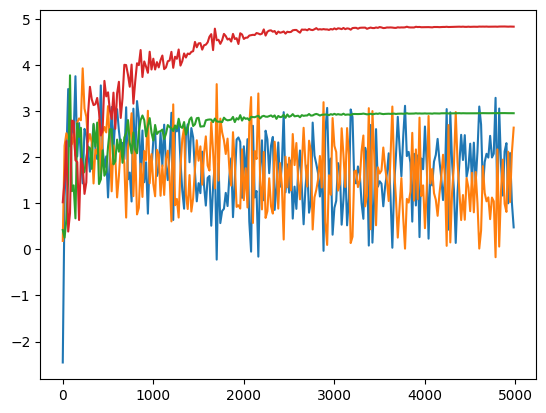

In [85]:
fig , ax = plt.figure(dpi=100), plt.axes()
ax.plot(steps, thetas)
plt.show()

## 2. Stochastic Gradient Descent - learning rate (**)

Repeat task 1 but using stochastic gradient descent instead. Also adjust number of epochs to see if you can find convergence. What kind of conclusions can you draw from your experiments. (**)

---

In [ ]:
epochs = 10
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_rate_schedule(t):
    """Decrease learning rate as training progresses"""
    return t0/(t+t1)

theta = np.random.randn(X.shape[1],1) # Anpassar till rätt features i X
m = len(X)
y = y.reshape(-1,1)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X[random_index:random_index+1] # this gives an extra dimension on the matrix
        y_i = y[random_index:random_index+1]
        gradients = 2*x_i.T.dot(x_i.dot(theta)-y_i)
        eta = learning_rate_schedule(epoch*m+i)
        theta -= eta*gradients


theta

array([[1.20236631],
       [1.99048155],
       [2.89739451],
       [4.70854958]])

## 3. Mini Batch Gradient Descent (**)

Now try different sizes of mini-batches and make some exploratory plots to see convergence. Also you can make comparison to the other algorithms by using same $\eta$ and same amount of epochs to see how they differ from each other in terms of convergence. (**)

In [103]:
y_pred = X@theta
MAE = np.mean(np.absolute(y-y_pred))
MSE = np.mean((y-y_pred)**2)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(0.7761281592489209, 0.9556240362448138, 0.9775602468619589)

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---